In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.397177,2.841527,-0.086222,-0.436823,1.080922,1
1,-2.875572,1.049764,-2.465980,-1.308540,2.717668,0
2,-1.528131,1.150957,-1.863532,-1.462249,1.004334,0
3,-3.301873,0.550137,1.528711,-1.006948,-0.984392,1
4,-2.812604,2.243862,-3.550759,-0.989749,0.826510,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_3768\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [8]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_3768\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_3768\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col1', 'target'], dtype='object')
Index(['col5', 'col2', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')


In [11]:
df3.head(20)

,col2,col3,target
57,1.080758,-1.323715,0
30,2.518031,-0.205544,1
85,1.331241,0.988381,1
24,-1.261098,2.788351,1
79,0.129918,0.310483,0
68,1.953470,-4.084377,0
38,1.278245,1.177604,1
23,-1.452494,3.724842,1
81,-0.404977,2.386706,1
37,-0.756166,3.121689,1


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree

[Text(0.5263157894736842, 0.9375, 'x[1] <= -0.661\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.3157894736842105, 0.8125, 'x[0] <= 2.306\ngini = 0.375\nsamples = 28\nvalue = [21, 7]'),
 Text(0.21052631578947367, 0.6875, 'x[0] <= -0.01\ngini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(0.15789473684210525, 0.5625, 'x[0] <= -0.705\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.10526315789473684, 0.4375, 'x[0] <= -2.053\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.05263157894736842, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15789473684210525, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.21052631578947367, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2631578947368421, 0.5625, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.42105263157894735, 0.6875, 'x[1] <= -0.919\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.3684210526315789, 0.5625, 'x[1] <= -1.943\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text

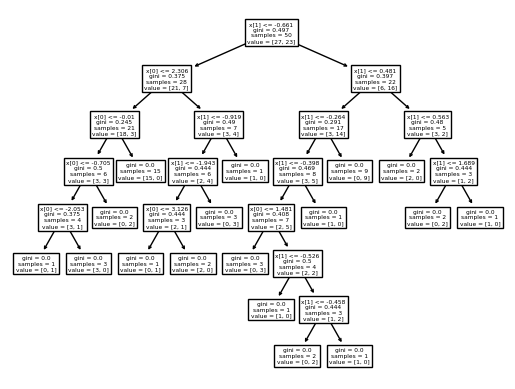

In [15]:
plot_tree(clf1)

[Text(0.35714285714285715, 0.95, 'x[0] <= 0.768\ngini = 0.449\nsamples = 50\nvalue = [33, 17]'),
 Text(0.14285714285714285, 0.85, 'x[1] <= 0.85\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.07142857142857142, 0.75, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.21428571428571427, 0.75, 'x[0] <= 0.695\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.14285714285714285, 0.65, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2857142857142857, 0.65, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5714285714285714, 0.85, 'x[1] <= 2.274\ngini = 0.339\nsamples = 37\nvalue = [29, 8]'),
 Text(0.5, 0.75, 'x[1] <= -2.379\ngini = 0.251\nsamples = 34\nvalue = [29, 5]'),
 Text(0.42857142857142855, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.65, 'x[0] <= 1.228\ngini = 0.213\nsamples = 33\nvalue = [29, 4]'),
 Text(0.5, 0.55, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.6428571428571429, 0.55, 'x[0] <= 1.419\ngini = 0.298\nsamples = 22

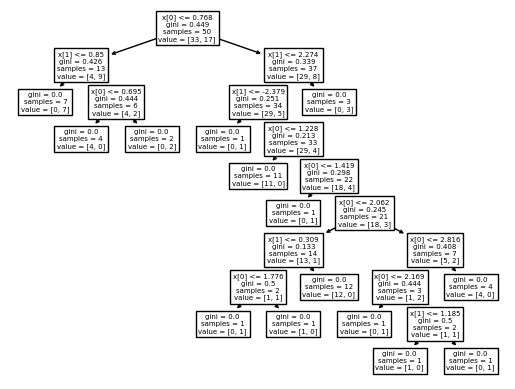

In [16]:
plot_tree(clf2)

[Text(0.5, 0.9166666666666666, 'x[1] <= -0.235\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.25, 0.75, 'x[0] <= 2.471\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.125, 0.5833333333333334, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.375, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.75, 'x[0] <= 0.61\ngini = 0.191\nsamples = 28\nvalue = [3, 25]'),
 Text(0.625, 0.5833333333333334, 'x[0] <= 0.112\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.5, 0.4166666666666667, 'x[1] <= 2.59\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.375, 0.25, 'x[0] <= -0.497\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.75, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.5833333333

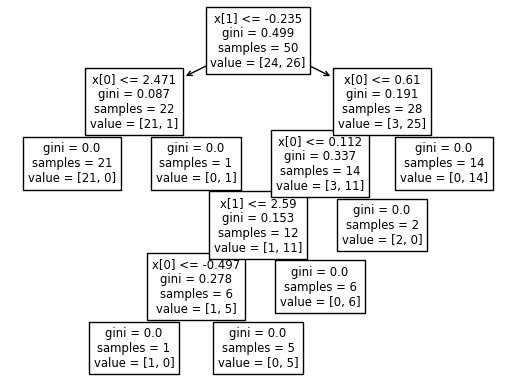

In [17]:
plot_tree(clf3)

In [18]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [20]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [22]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X.shape

(500, 2)

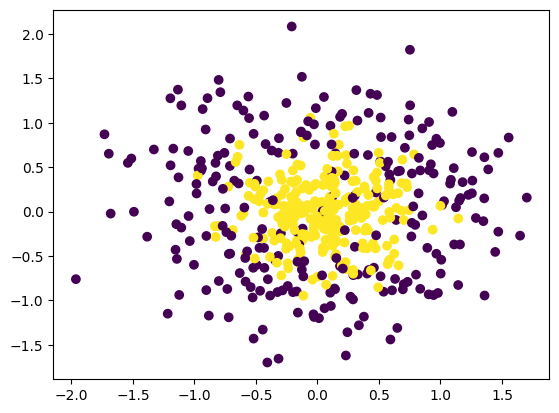

In [24]:
plt.scatter(X[:,0],X[:,1],c=y)

In [25]:
from sklearn.tree import DecisionTreeClassifier

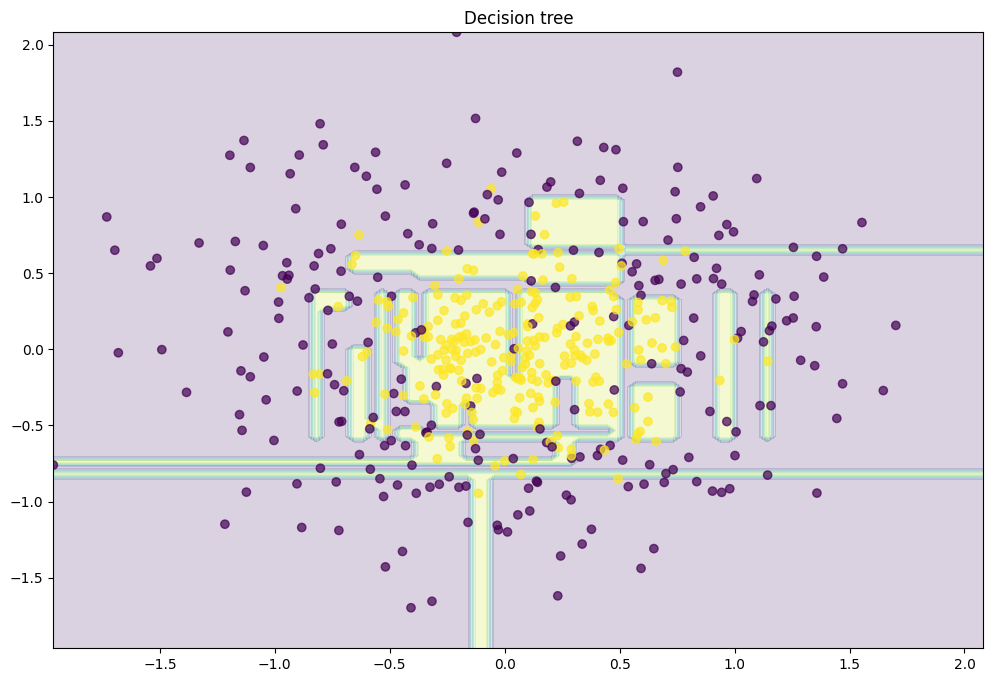

In [26]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

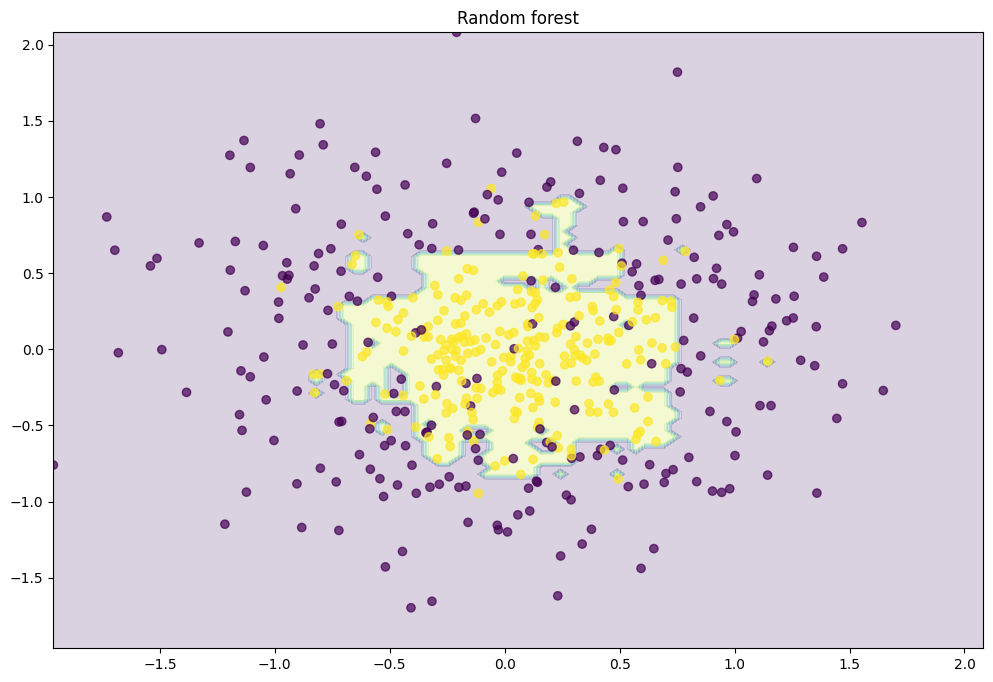

In [28]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

In [29]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

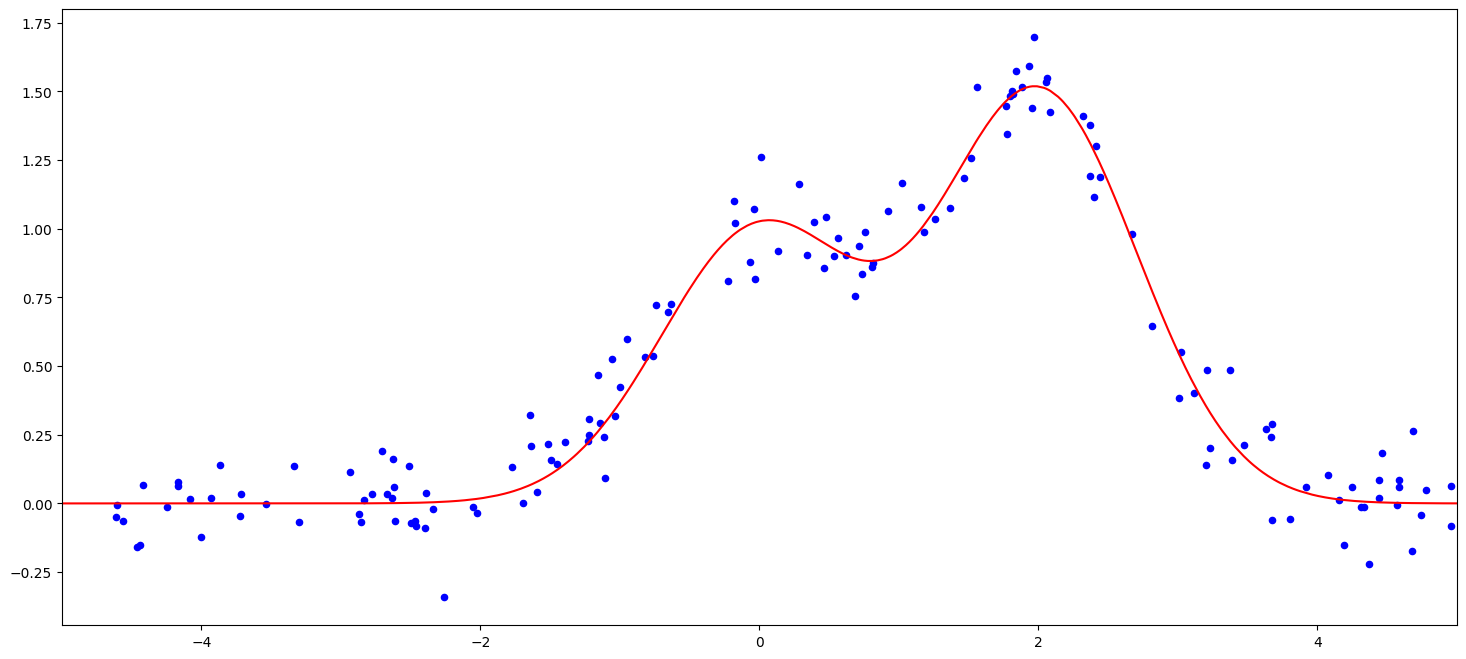

In [30]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 22.70')

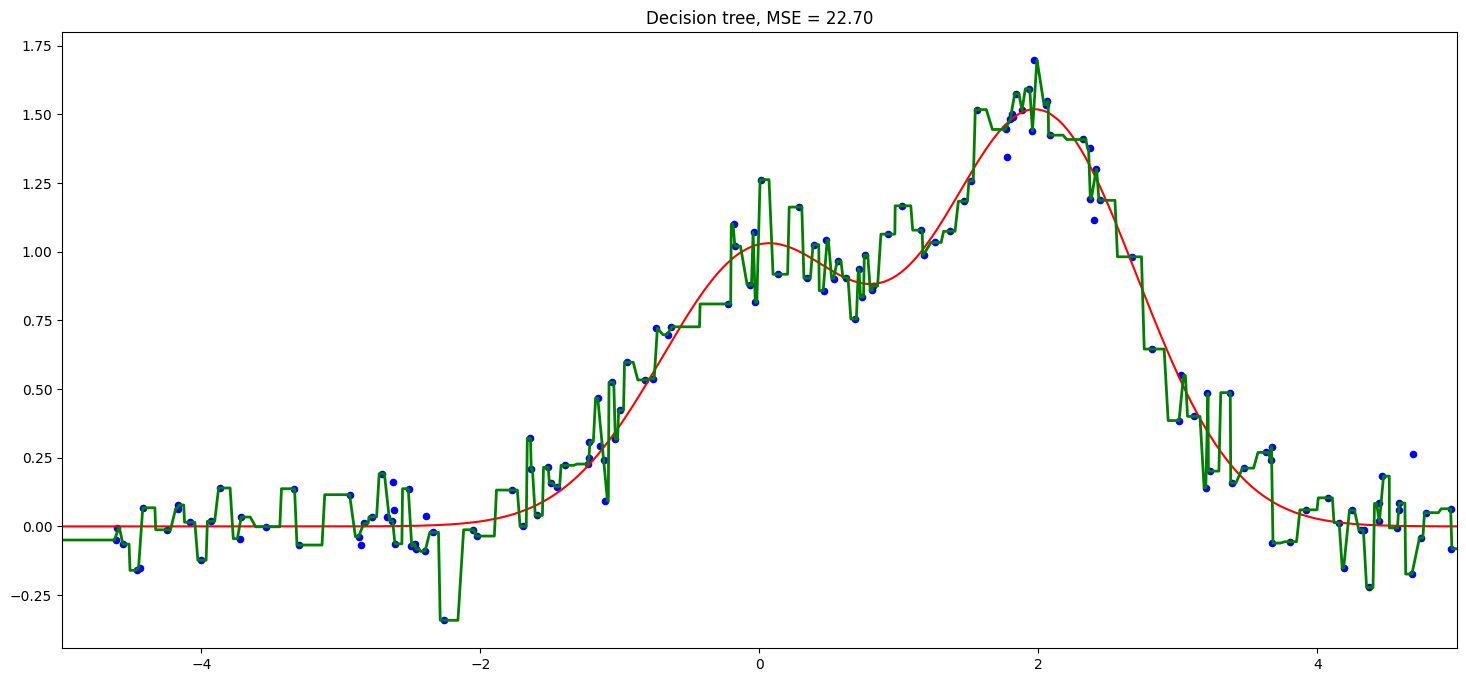

In [31]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

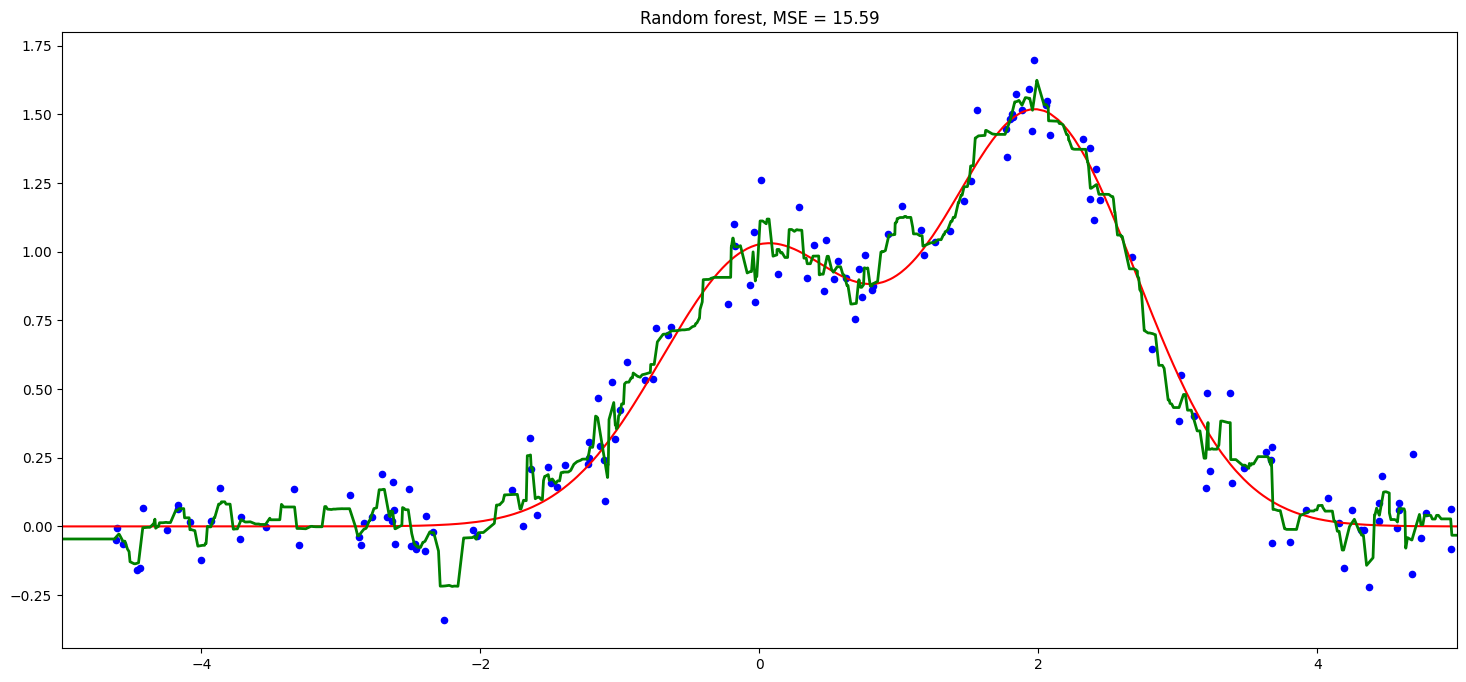

In [34]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));


# bagging-vs-random

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [36]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [37]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.418680,-0.504945,2.067664,-3.571807,2.345404,0
1,1.834031,-2.577555,0.256827,-0.953110,-1.575071,1
2,-3.428727,-0.151782,-1.469047,-1.726592,-1.065490,1
3,-2.318462,0.180512,-0.506968,-0.922062,-0.290768,1
4,-1.149018,-1.242388,2.059714,-1.122700,1.232480,0


In [38]:
bag = BaggingClassifier(max_features=2)

In [39]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

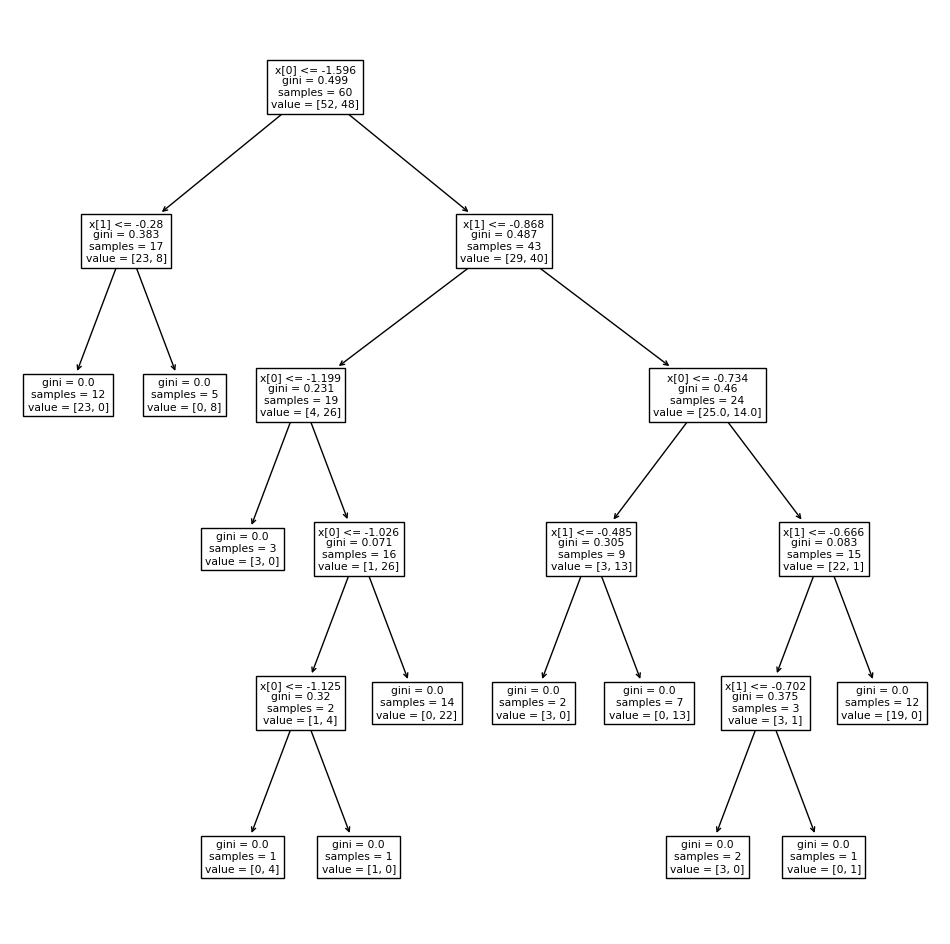

In [40]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [41]:
rf = RandomForestClassifier(max_features=2)

In [42]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

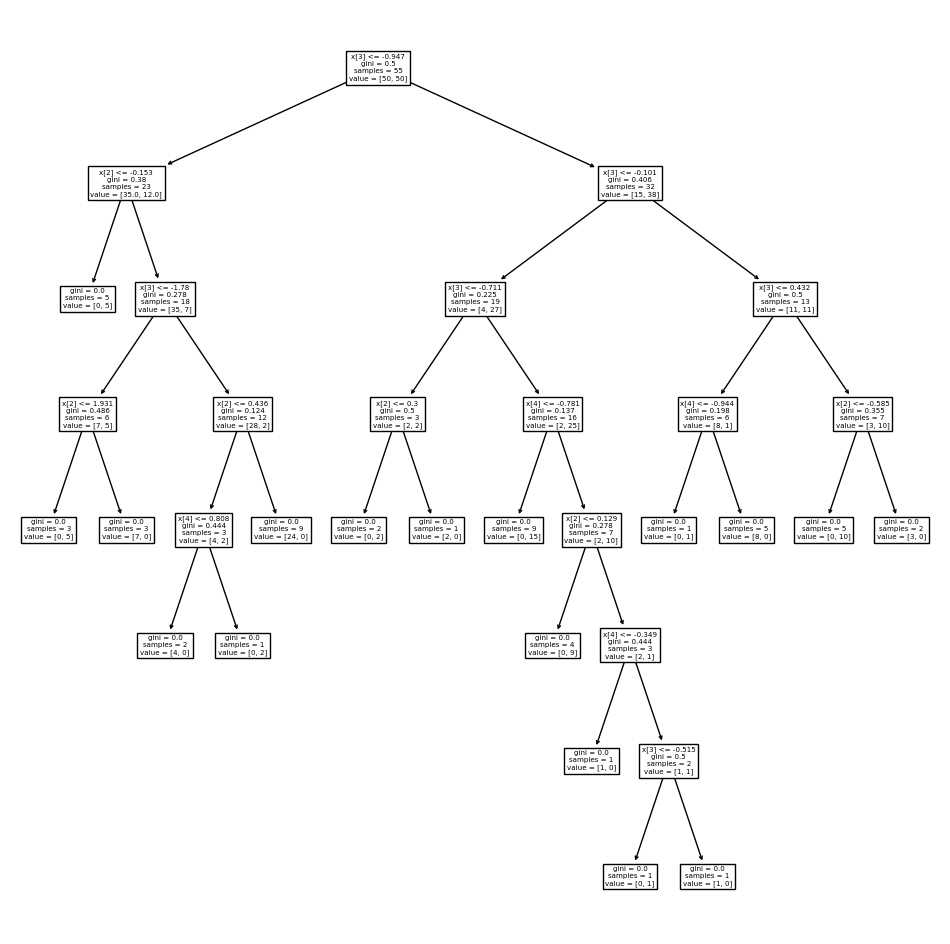

In [43]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

### feature-importance

In [44]:
import pandas as pd
import seaborn as sns

In [46]:
df = pd.read_csv('mnist_train.csv')

In [47]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

<Axes: >

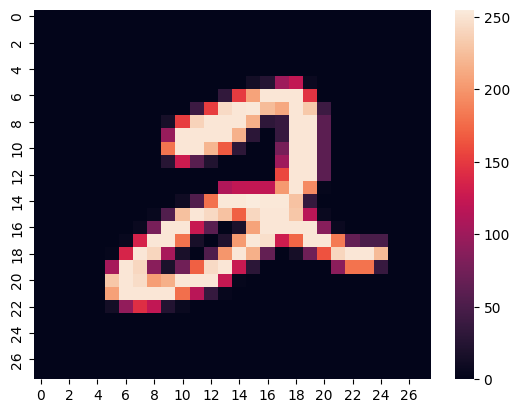

In [49]:
sns.heatmap(X.iloc[5].values.reshape(28,28))

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1)

rf.fit(X,y)

RandomForestClassifier(n_jobs=-1)

In [52]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.29519412e-07, 1.07730356e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.77442672e-06,
       2.19614914e-06, 3.60050650e-07, 3.60721504e-06, 2.30967135e-06,
       3.08962053e-06, 5.19838578e-06, 1.13081309e-06, 2.63250884e-06,
       7.95273021e-06, 1.75481513e-06, 3.50307422e-06, 0.00000000e+00,
       9.85123847e-07, 0.00000000e+00, 4.84315132e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [53]:
rf.feature_importances_.shape

(784,)

<Axes: >

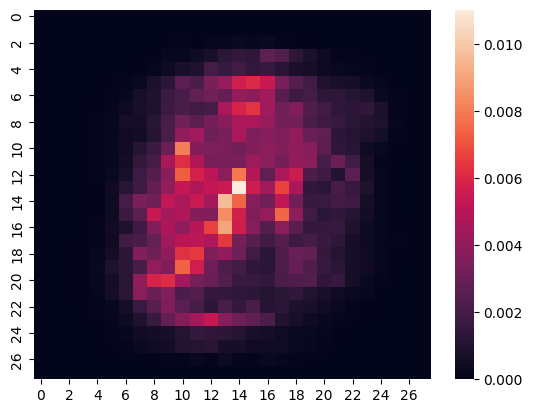

In [54]:
sns.heatmap(rf.feature_importances_.reshape(28,28))

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame(pd.Series([12,14,1,8,4,33,0,24,17,10]), columns=['sample'])

print(df.sample(10,replace=True))
print(df.sample(10,replace=True))
# 8, 10, 24

   sample
4       4
3       8
3       8
7      24
5      33
1      14
3       8
2       1
8      17
2       1
   sample
7      24
7      24
7      24
0      12
1      14
6       0
5      33
7      24
1      14
1      14


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier with oob_score=True
rf = RandomForestClassifier(oob_score=True, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Predict the labels of the test set
predictions = rf.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)

# Get the OOB score
oob_score = rf.oob_score_

accuracy, oob_score

(0.9, 0.9075)

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)

# Train the classifiers
rf.fit(X_train, y_train)
et.fit(X_train, y_train)

# Predict the labels of the test set
rf_predictions = rf.predict(X_test)
et_predictions = et.predict(X_test)

# Compute the accuracy of the classifiers
rf_accuracy = accuracy_score(y_test, rf_predictions)
et_accuracy = accuracy_score(y_test, et_predictions)

rf_accuracy, et_accuracy

(0.9, 0.935)

In [4]:
print("RF")

RF
